# Gaussian Process Regression for trust calculation

+ Confidence quantification
+ fast, gaussian process regression benefits - GOod for small observed points
+ 

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
from sklearn.preprocessing import RobustScaler, minmax_scale
from matplotlib import pyplot as plt


Read and clean the csv

In [146]:
CONFIDENCE_SCALE = 100
NOISE_ADDITION = 10/CONFIDENCE_SCALE
NOISE_BOUNDARIES = 0.01
LOW_TRUST_MULTIPLIER = 5*4
MEDIUM_TRUST_MULTIPLIER = 5*2
HIGH_TRUST_MULTIPLIER = 5*1

In [147]:
tmp = np.genfromtxt("clean_value_GPON.csv", delimiter=",")
container_stress_test_array = minmax_scale(tmp[1:, 4]/(1024*1024))*90
print(container_stress_test_array)
size_t = container_stress_test_array.shape[0]

[36.57761066 36.69530505 36.13782158 36.30673222 46.45186416 44.67699868
 40.50965867 54.84813417 65.8868008  68.05069638 71.52199189 73.93447026
 77.06758891 78.4838709  81.36330106 83.113361   88.18880751 88.70014865
 86.09138427 85.42141325 90.         85.89749992 86.19405376 64.80673948
 61.84342458 63.47868884 57.89341991 55.08019095 60.73008932 59.67377481
 61.48978008 61.22774613 47.06221354 43.4419858  31.44153644 20.71632757
  0.          3.39422916  1.5296897   5.13803695  6.42337678 11.48968171
 11.21360678  1.8872072 ]


In [148]:
X = np.atleast_2d(np.linspace(0, size_t - 1, size_t)).T

y = container_stress_test_array
# dy = 0.5 + 200.0 * np.random.random(y.shape)

noise = np.random.normal(0, NOISE_ADDITION, size=y.shape[0])
y += noise


In [149]:
# X = np.atleast_2d(np.linspace(0, 43, 44)).T

# y = container_stress_test_array
# # dy = 0.5 + 200.0 * np.random.random(y.shape)
# noise_var = 0.1
# noise = np.random.normal(0, noise_var, size=y.shape[0])
# y += noise

# Instantiate a Gaussian Process model
kernel =  RBF(100, (1e-1, 1e2)) + WhiteKernel(noise_level=NOISE_ADDITION, noise_level_bounds=(1e-10, NOISE_BOUNDARIES)) # *C(30.0, (1e-3, 1e3)) 
#high_noise = 0.7
#med = 0.1
#low = 0.01

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gp.fit(X, y)

x = np.atleast_2d(np.linspace(0, 43, 400)).T
y_pred, sigma = gp.predict(x, return_std=True)


In [150]:
#LOW_TRUST_MULTIPLIER = 4*4
#MEDIUM_TRUST_MULTIPLIER = 4*2
#HIGH_TRUST_MULTIPLIER = 4*1
plot_x = 20
plot_y = 80

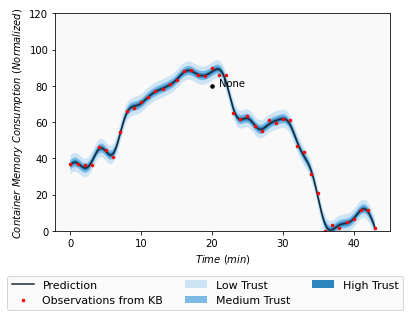

In [152]:
fig, axs = plt.subplots()
axs.set_facecolor('#f9f9f9')
axs.plot(x, y_pred, '-', color="#1c2833", label='Prediction', linewidth=1.5)
axs.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma * LOW_TRUST_MULTIPLIER,
                        (y_pred + 1.9600 * sigma * LOW_TRUST_MULTIPLIER)[::-1]]),
         alpha=0.6, fc='#aed6f1', ec='None', label='Low Trust')
axs.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma * MEDIUM_TRUST_MULTIPLIER,
                        (y_pred + 1.9600 * sigma * MEDIUM_TRUST_MULTIPLIER)[::-1]]),
         alpha=0.8, fc='#5dade2', ec='None', label='Medium Trust')
axs.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma * HIGH_TRUST_MULTIPLIER,
                        (y_pred + 1.9600 * sigma * HIGH_TRUST_MULTIPLIER)[::-1]]),
         alpha=1.0, fc='#2e86c1', ec='None', label='High Trust')
axs.plot(X, y, ".r" ,label='Observations from KB', markersize=5)
axs.set_xlabel('$Time~(min)$')
axs.set_ylabel('$Container~Memory~Consumption~(Normalized)$')
axs.set_ylim([0, 120])
axs.legend(loc='upper right')
axs.plot(plot_x,plot_y,'.', color="#000000", markersize=7) 
#plt.vlines(plot_x, 0, plot_y, linestyle="dashed", color="#000000")
#plt.hlines(plot_y, 0, plot_x, linestyle="dashed", color="#000000")
axs.text(plot_x+1, plot_y,'None', color="#000000")
axs.legend(fontsize=11,loc=2, ncol=3, bbox_to_anchor=(-0.16, -0.18),)

plt.savefig("gpon_stress_plot_noise_low.pdf", bbox_inches='tight')
#print(gp.sample_y(np.atleast_2d(np.array([10]).T)))

In [101]:
gp.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel__k1': RBF(length_scale=100),
 'kernel__k2': WhiteKernel(noise_level=0.1),
 'kernel__k1__length_scale': 100,
 'kernel__k1__length_scale_bounds': (0.1, 100.0),
 'kernel__k2__noise_level': 0.1,
 'kernel__k2__noise_level_bounds': (1e-10, 0.6),
 'kernel': RBF(length_scale=100) + WhiteKernel(noise_level=0.1),
 'n_restarts_optimizer': 10,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

<Figure size 432x288 with 0 Axes>